In [1]:
import pandas as pd
import numpy as np

In [2]:
# Prepare a classification model using Naive Bayes for salary data 
df = pd.read_csv(r"C:\Users\shiva\Downloads\SalaryData_Test.csv")
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'educationno'),
  Text(2, 0, 'capitalgain'),
  Text(3, 0, 'capitalloss'),
  Text(4, 0, 'hoursperweek')])

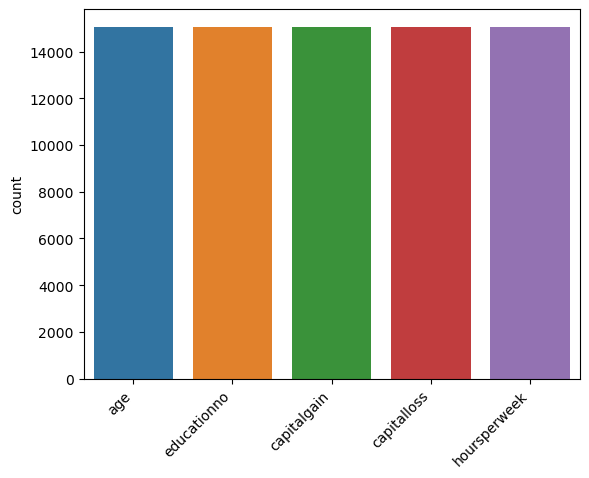

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,)
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='age', ylabel='hoursperweek'>

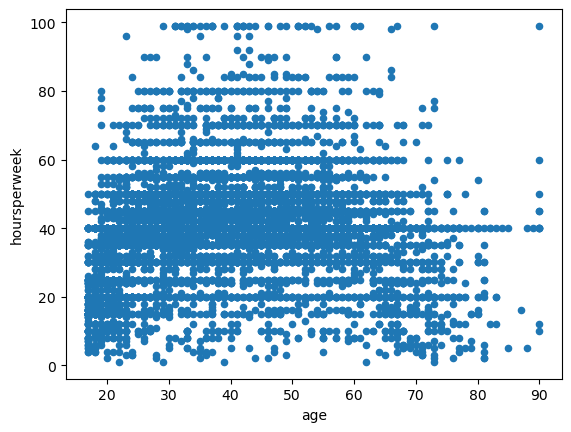

In [5]:
df.plot(kind = 'scatter',x = 'age',y = 'hoursperweek')

<Axes: >

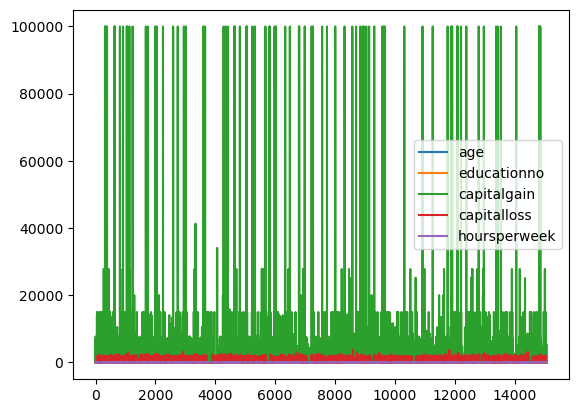

In [6]:
df.plot(kind = 'line')

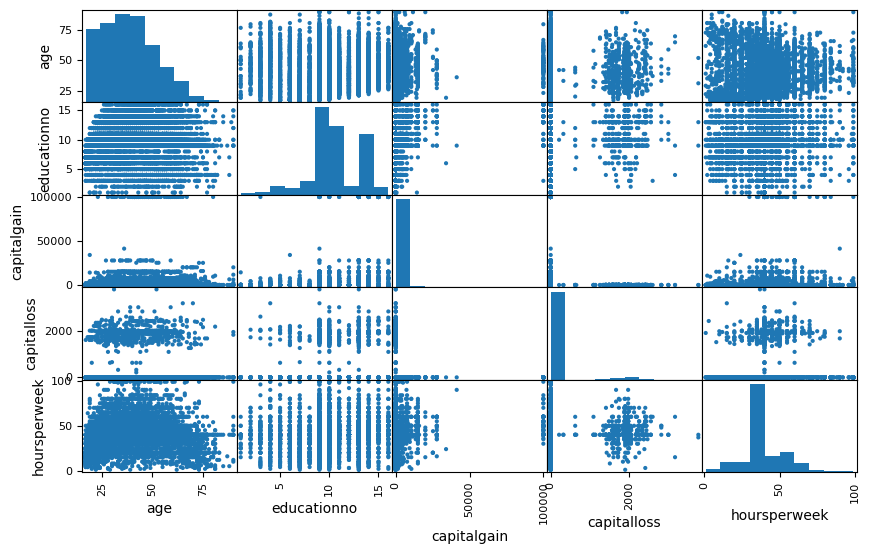

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1,figsize=(10,6));

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Part -A  ,Test data

In [12]:
X= df.drop('Salary',axis = 1)
y = df['Salary']

In [10]:
X = pd.get_dummies(X, drop_first=True)
# to convert categorical data into numerical data.
                    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Confusion Matrix:
[[1960  311]
 [ 220  521]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.90      0.86      0.88      2271
        >50K       0.63      0.70      0.66       741

    accuracy                           0.82      3012
   macro avg       0.76      0.78      0.77      3012
weighted avg       0.83      0.82      0.83      3012



In [11]:
INSIGHTS:
Accuracy : 82%,  This indicates the percentage of correctly classified instances among the total instances.
confusion matrix : It shows the number of true positives (1960), true negatives (521), false positives (311), and false negatives (220).
precision : measures the accuracy of the positive predictions.
Recall : measures the ability to capture the true instances.
F1 score = harmonic mean of precession and Recall.
*For the "<=50K" class, the precision is 90%, recall is 86%, and F1-score is 88%. 
This suggests that the model performs well in identifying instances with income less than or equal to 50K.
*For the ">50K" class, the precision is 63%, recall is 70%, and F1-score is 66%. 
The model has relatively lower precision and recall for this class.

SyntaxError: invalid decimal literal (1709161792.py, line 8)

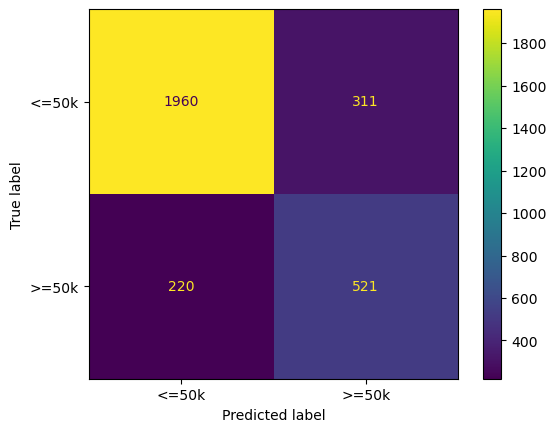

In [13]:
labels=['<=50k','>=50k']
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

# Part _B  ,Train data

In [14]:
df1 = pd.read_csv(r"C:\Users\shiva\Downloads\SalaryData_Train.csv")
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [16]:
df1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<Axes: ylabel='count'>

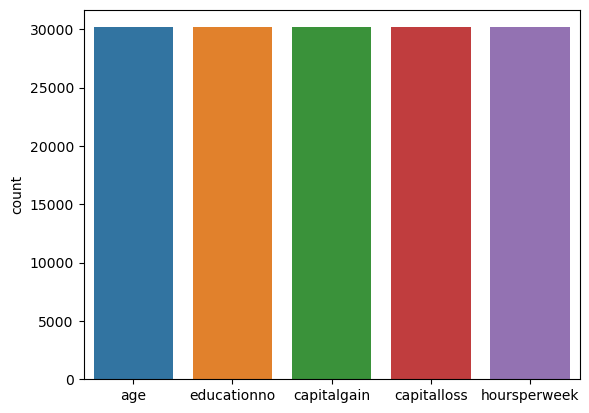

In [17]:
sns.countplot(data = df1)

<Axes: xlabel='age', ylabel='capitalgain'>

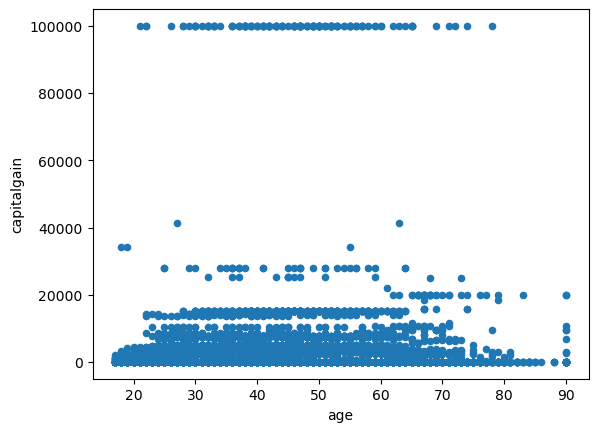

In [18]:
df1.plot(kind = 'scatter',x = 'age',y = 'capitalgain')

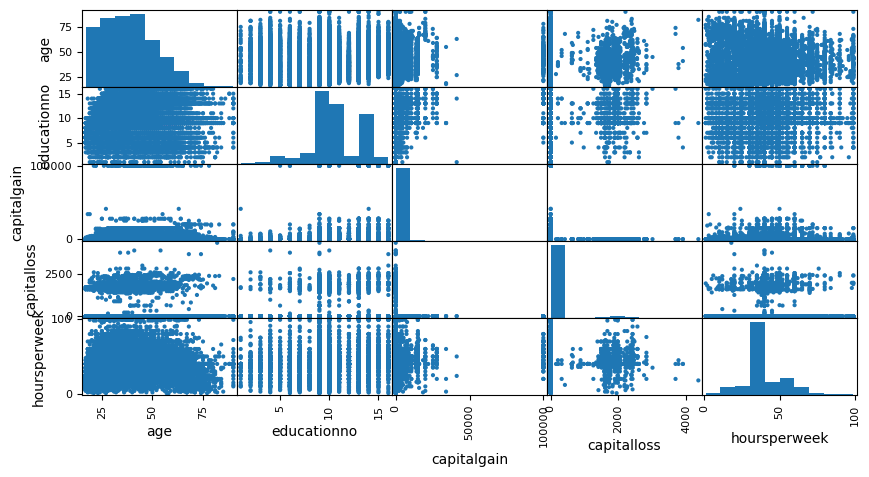

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=1,figsize=(10,5));

In [20]:
X = df1.drop('Salary',axis = 1)
y = df1['Salary']

In [21]:
X = pd.get_dummies(X, drop_first = True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Navie bayes
classifier_nb = GaussianNB()
classifier_nb.fit(X_train,y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:2f}')

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print('Classification report')
print(classification_report(y_test,y_pred))

Accuracy:0.821648
Confusion Matrix:
[[3860  614]
 [ 462 1097]]
Classification report
              precision    recall  f1-score   support

       <=50K       0.89      0.86      0.88      4474
        >50K       0.64      0.70      0.67      1559

    accuracy                           0.82      6033
   macro avg       0.77      0.78      0.77      6033
weighted avg       0.83      0.82      0.82      6033



In [ ]:
INSIGHTS:
Accuracy : 82.23%,This indicates the percentage of correctly classified instances among the total instances.
Confusion_matrix = It shows the number of true positives (3966), true negatives (995), false positives (585), and false negatives (487).
precision : accuracy of positive prediction
recall = measures the ability of the model to capture positive rate.
F1_score = mean of precision and Recall.
Class-Specific Metrics:
*For the "<=50K" class, the precision is 89%, recall is 87%, and F1-score is 88%. 
This suggests that the model performs well in identifying instances with income less than or equal to 50K.
*For the ">50K" class, the precision is 63%, recall is 67%, and F1-score is 65%. 
The model has relatively lower precision and recall for this class.

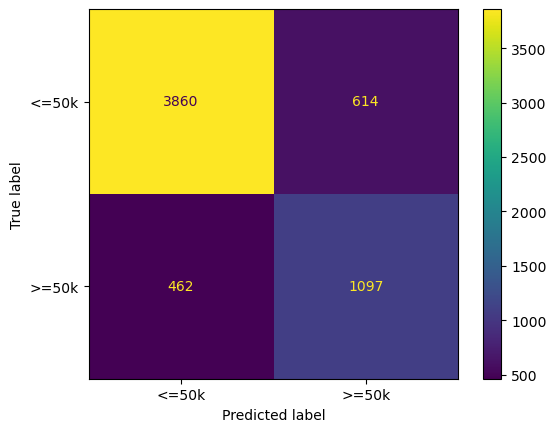

In [22]:
labels=['<=50k','>=50k']
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
data = df1
disp.plot()